In [2]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import re

In [3]:
nlp = spacy.load("en_core_web_sm")
with open('output.txt', 'r', encoding='utf-8') as file:
    novel_text = file.read()

doc = nlp(novel_text)
characters = [ent.text.strip() for ent in doc.ents if ent.label_ == "PERSON"]
characters = [re.sub(r'[\n\x02]', '', char) for char in characters]
character_mapping = {}
for i, char in enumerate(characters):
    character_mapping[f'Character{i+1}'] = char

characters = [character_mapping.get(char, char) for char in characters]
unique_characters = list(set(characters))


In [4]:
print(unique_characters)

['Ronan', 'Smelting', 'Ginny', 'Uncle Vernon', 'Yeh', 'Tom', 'Hannah', 'Nicholas de Mimsy-Porpington', 'Gran', 'Harry hardly', 'Wizard', 'Mother', 'Gordon', 'Fred and George’s', 'Nah', 'ERISED hristmas', 'Ollivander', 'Lee Jordan', 'Severus', 'Quidditch', 'Dean Thomas', 'Fred and George Weasley', 'Leviosa', 'Galleons', 'KILL HIM', 'Uncle Vernon’s', 'strawberry', 'Bludger', 'Arsenius Jigger DIAGON', 'Potters', 'Piers Polkiss', 'Harry quietly', 'Ron — Ron', 'Harry stayed', 'bin killin', 'Quirrell', 'Terry', 'Howard', 'Charlie CHAPTER', 'Hedwig', 'Boa Constrictor', 'Knuts', 'Fred', 'Phyllida Spore', 'Harry remembered Ron', 'Harry, Malfoy', 'Bane', 'Harry had', 'Snape', 'Harry Hunting', 'Paws', 'Uncle Algie', 'Fungi', 'Ron bitterly', 'Spinnet', 'Neville Longbottom', 'Harry Potter Day', 'Harry, Ron and Hermione', 'bush', 'Harry borrowed Ron’s', 'Dedalus Diggle’s', 'Wizard sport', 'H. Potter', 'Aunt', 'Friar', 'Lily', 'Dursleys', 'Christmas', 'yeh everythin’', 'Brown', 'Madam', 'Jell', 'Tere

In [5]:
len(unique_characters)

310

In [21]:
#removing unwanted ele
remov_list=['Madam','Harvey','ERISED hristmas', 'Yorkshire', 'Vol', 'Newt Scamander', 'Fred and George stole','Grand Sorc', 'Devon', 'McGonagall', 'Harry outta', 'Quaffle', 'Flamel', 'Harry told', 'Hurry', 'Tufty', 'Seeker', 'Claude Garamond', 'Firs', 'Paracelsus', 'Robert Slimbach', 'Cauldron Cakes', 'H. Potter', 'Aunt', 'Friar', 'Lily', 'Christmas', 'yeh everythin’', 'Library', 'Patil', 'Susan', 'Fred and George', 'Wizard indeed', 'Sprout', 'Minerva McGonagall', 'Ron prodding Dean’s', 'Gryffindor Tower', 'Mom','Aunt Petunia', 'Snot', 'yeh don', 'Lisa', 'the Gryffindor Beater', 'Harry gasped', 'George Weasley', 'Crabbe and Goyle', 'Draco Malfoy', 'Dudley', 'Ronniekins' 'Harry whispered', 'Elixir', 'Harry moved', 'Yvonne','Miss Granger', 'Hogwarts', 'Bertie Bott’s','Jell', 'Terence Higgs', 'Mummy', 'Everywhere Harry','Firenze', 'Willard', 'Marge', 'Vindictus Viridian', 'Vernon', 'Charlie', 'hairy leg', 'Percy Weasley', 'Don','Quentin Trimble', 'Harry hardly', 'Wizard', 'Mother', 'Gordon', 'Fred and George’s', 'Nah', 'Ollivander', 'Lee Jordan', 'Severus', 'Dean Thomas', 'Leviosa', 'Galleons', 'Uncle Vernon’s', 'Bludger', 'Arsenius Jigger DIAGON','Fred or', 'don', 'Stonewall High','Stonewall', 'Miranda Goshawk', 'Boa Constrictor', 'Emeric Switch', 'Brown', 'Fungi', 'Cokeworth Harry', 'Locomotor Mortis', 'Pomfrey', 'Harry darkly', 'Uncle Algie', 'Dursleys', 'Harry knew Ron', 'Cliodna', 'Algie', 'Shut', 'Quirrell', 'bin killin', 'Vampires', 'strawberry', 'Griphook', 'Gran', 'Alicia Spinnet', 'Mighta bin a dragon', 'Charlie CHAPTER', 'Flitwick', 'Next Door', 'Morgana','fer yeh', 'Bin', 'Harry and Ron','Harry borrowed Ron’s', 'Uncle', 'Aaah', 'Angelina', 'Blimey', 'KILL HIM', 'Doris Crockford', 'Crabbe', 'Harry, Malfoy', 'Malkin','Ron — Ron', 'Haaaaaa', 'Harry felt', 'Agrippa','knew yeh didn','Ron grumpily', 'Quidditch', 'Weasley', 'the Leaky Cauldron', 'Licorice Wands', 'Fred and George Weasley', 'Hannah', 'Harold', 'n’t Neville', 'Longbottom', 'Put-Outer', 'Mommy','Fer', 'Smeltings', 'Harry Hunting','George', 'Piers Polkiss', 'Malcolm', 'Angelina — Keeper Bletchley', 'Seekers', 'Norbert', 'Angelina Johnson', 'Gringotts', 'Dark', 'Vernon Dursley', 'Harry remembered Ron','Harry coldly', 'Malkin', 'Pansy Parkinson', 'Bin', 'Muggles', 'Lee Jordan’s', 'Oliver Wood', 'the Leaky Cauldron', 'Chaser Angelina Johnson', 'nothin’', 'Figg', 'Oliver', 'Dean', 'Norbert', 'Johnson', 'Dursley', 'Harry felt', 'Percy chase Fred and George', 'Blimey', 'Norris','Harry and', 'Unicorn', 'George', 'Angelina — Keeper Bletchley', 'Misters Fred', 'Head Boy', 'Weasley', 'Percy', 'Ronniekins' 'Alicia Spinnet', 'Mighta bin a dragon', 'Ron darkly', 'Harry nodded', 'Put-Outer', 'Hmm', 'H.“', 'Nicholas de Mimsy', 'Malkin’s Robes', 'Harold', 'bin', 'Trevor', 'Stonewall High', 'Weasleys', 'Angela Biola', 'Harry','Haaaaaa', 'Seamus Finnigan', 'Chocolate Frogs', 'Ron darkly']
unique_characters = [item for item in unique_characters if item not in remov_list]

In [22]:
unique_characters.append('Harry')

In [23]:
print(unique_characters)

['Ronan', 'Smelting', 'Ginny', 'Uncle Vernon', 'Yeh', 'Tom', 'Nicholas de Mimsy-Porpington', 'Potters', 'Harry quietly', 'Harry stayed', 'Terry', 'Howard', 'Hedwig', 'Knuts', 'Fred', 'Phyllida Spore', 'Bane', 'Harry had', 'Snape', 'Paws', 'Ron bitterly', 'Spinnet', 'Neville Longbottom', 'Harry Potter Day', 'Harry, Ron and Hermione', 'bush', 'Dedalus Diggle’s', 'Wizard sport', 'Potions', 'Dark Magic', 'Fred Weasley', 'Harry CHAPTER', 'n’t Malfoy', 'Leaky', 'Chaser', 'David Saylor', 'Fang', 'Ron eagerly', 'Leaky Cauldron', 'Seamus', 'Filch', 'Peevsie', 'Wood', 'The Leaky Cauldron', 'Harry one', 'Hooch', 'Hufflepuff', 'Bathilda Bagshot Magical Theory', 'Harry blankly', 'Bill', 'bin waitin', 'Nicolas Flamel', 'Harry’s', 'Harry, Ron', 'Charlie Weasley', 'Albus Dumbled', 'Ron Weasley', 'Nimbus', 'Dumbledore', 'Malfoy', 'Jim McGuffin', 'James Potter', 'Cupboard', 'Atta', 'Mighta', 'Harry Potter', 'Baron', 'Albus Dumbledore', 'Harry eagerly', 'Reckon Dumbledore’s', 'Lee', 'Potter', 'Kent', 'Ne

In [24]:
len(unique_characters)

121

In [25]:
G = nx.Graph()
for sentence in doc.sents:
    sentence_characters = [ent.text.strip() for ent in sentence.ents if ent.text.strip() in unique_characters]
    for char1 in sentence_characters:
        for char2 in sentence_characters:
            if char1 != char2:
                G.add_edge(char1, char2)

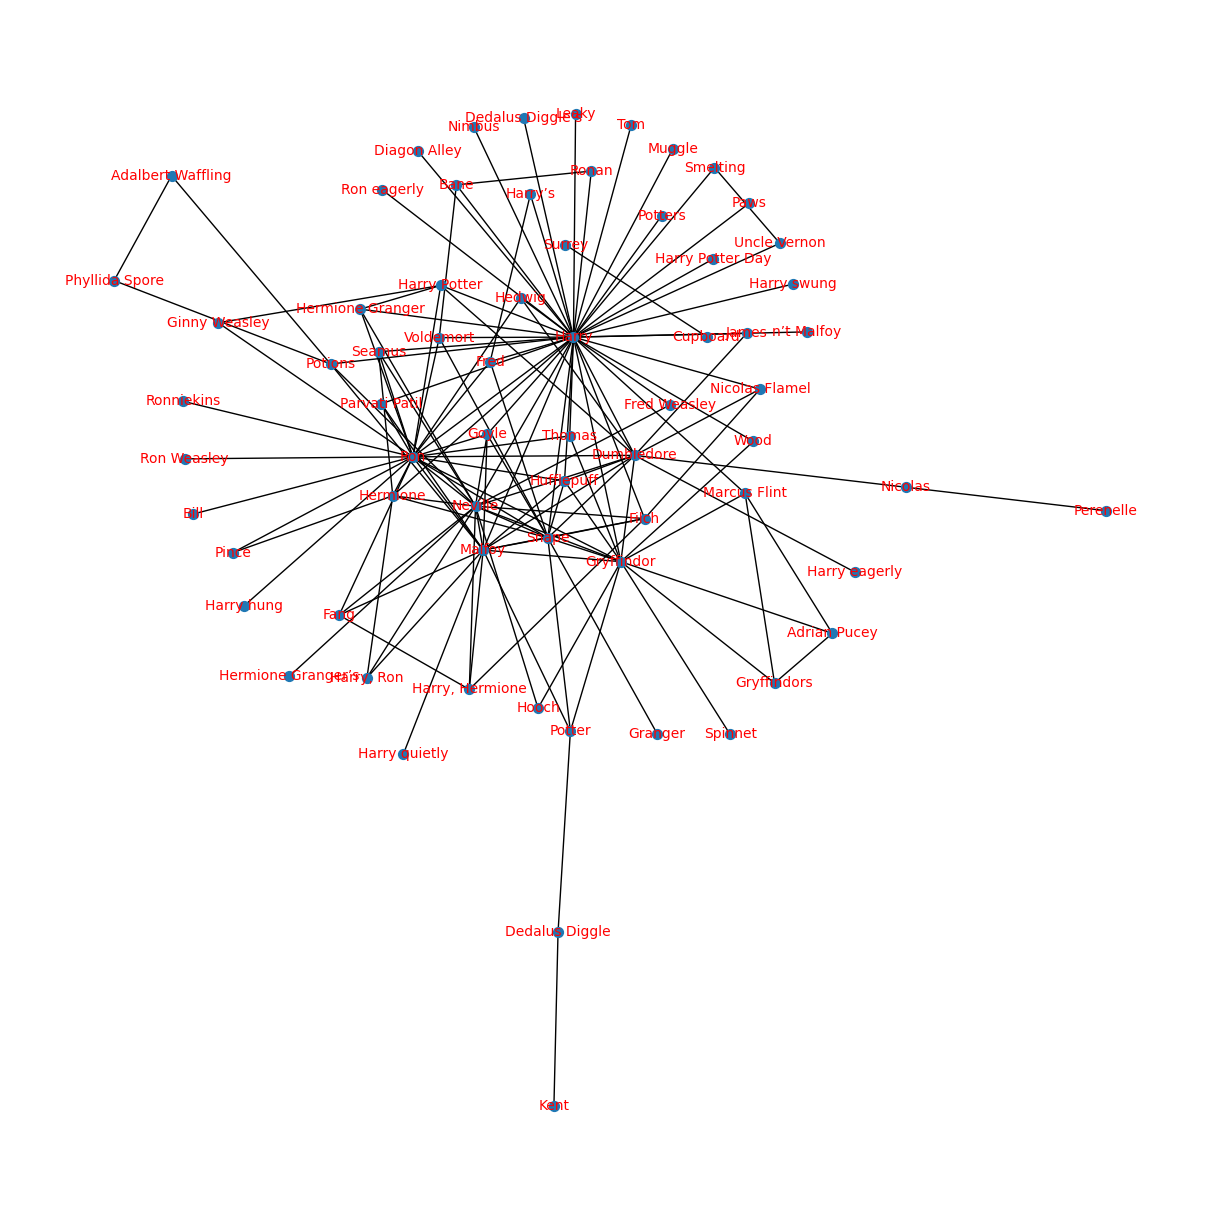

In [27]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=50, font_color='red')
plt.show()

In [28]:
len(G)

68

In [30]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank_centrality = nx.pagerank(G)

In [35]:
degree_centrality

{'Kent': 0.014925373134328358,
 'Dedalus Diggle': 0.029850746268656716,
 'Potters': 0.014925373134328358,
 'Harry': 0.6119402985074627,
 'Harry Potter Day': 0.014925373134328358,
 'Dumbledore': 0.19402985074626866,
 'James': 0.029850746268656716,
 'Uncle Vernon': 0.029850746268656716,
 'Paws': 0.014925373134328358,
 'Smelting': 0.029850746268656716,
 'Cupboard': 0.014925373134328358,
 'Surrey': 0.014925373134328358,
 'Muggle': 0.014925373134328358,
 'Adalbert Waffling': 0.029850746268656716,
 'Phyllida Spore': 0.029850746268656716,
 'Potions': 0.07462686567164178,
 'Tom': 0.014925373134328358,
 'Leaky': 0.014925373134328358,
 'Potter': 0.05970149253731343,
 'Dedalus Diggle’s': 0.014925373134328358,
 'Nimbus': 0.014925373134328358,
 'Hufflepuff': 0.08955223880597014,
 'Diagon Alley': 0.014925373134328358,
 'Ron': 0.3582089552238806,
 'Ronniekins': 0.014925373134328358,
 'Ron eagerly': 0.014925373134328358,
 'Voldemort': 0.05970149253731343,
 'Nicolas Flamel': 0.04477611940298507,
 'Ron 

In [37]:
betweenness_centrality

{'Kent': 0.0,
 'Dedalus Diggle': 0.028946178199909543,
 'Potters': 0.0,
 'Harry': 0.5377468717020957,
 'Harry Potter Day': 0.0,
 'Dumbledore': 0.10086274974334676,
 'James': 0.0,
 'Uncle Vernon': 0.0,
 'Paws': 0.0,
 'Smelting': 0.0,
 'Cupboard': 0.0,
 'Surrey': 0.0,
 'Muggle': 0.0,
 'Adalbert Waffling': 0.0,
 'Phyllida Spore': 0.0,
 'Potions': 0.05698778833107191,
 'Tom': 0.0,
 'Leaky': 0.0,
 'Potter': 0.05698778833107191,
 'Dedalus Diggle’s': 0.0,
 'Nimbus': 0.0,
 'Hufflepuff': 0.0,
 'Diagon Alley': 0.0,
 'Ron': 0.18950521562461872,
 'Ronniekins': 0.0,
 'Ron eagerly': 0.0,
 'Voldemort': 0.002336800844263531,
 'Nicolas Flamel': 0.00036182722749886925,
 'Ron Weasley': 0.0,
 'Harry Potter': 0.006837026986280718,
 'Gryffindor': 0.11730524864853221,
 'Bill': 0.0,
 'Hermione Granger': 0.00039126158529143604,
 'Goyle': 0.0,
 'Malfoy': 0.0965761021731171,
 'Neville': 0.09626470820500672,
 'Hermione': 0.013143517621129561,
 'Thomas': 0.0,
 'Snape': 0.0629477073506924,
 'Hedwig': 0.0,
 'Seamus'

In [38]:
closeness_centrality

{'Kent': 0.21819965914372774,
 'Dedalus Diggle': 0.2802653399668325,
 'Potters': 0.40165414963399565,
 'Harry': 0.6780613063713691,
 'Harry Potter Day': 0.40165414963399565,
 'Dumbledore': 0.5168827991191584,
 'James': 0.41215491171593016,
 'Uncle Vernon': 0.40422885572139305,
 'Paws': 0.40165414963399565,
 'Smelting': 0.40422885572139305,
 'Cupboard': 0.014925373134328358,
 'Surrey': 0.014925373134328358,
 'Muggle': 0.40165414963399565,
 'Adalbert Waffling': 0.3076082999635967,
 'Phyllida Spore': 0.3076082999635967,
 'Potions': 0.44408240487702333,
 'Tom': 0.40165414963399565,
 'Leaky': 0.40165414963399565,
 'Potter': 0.38686933431004483,
 'Dedalus Diggle’s': 0.40165414963399565,
 'Nimbus': 0.40165414963399565,
 'Hufflepuff': 0.48137176711860546,
 'Diagon Alley': 0.40165414963399565,
 'Ron': 0.5630330490405118,
 'Ronniekins': 0.3582937584803257,
 'Ron eagerly': 0.40165414963399565,
 'Voldemort': 0.44097693351424694,
 'Nicolas Flamel': 0.4176139171691213,
 'Ron Weasley': 0.358293758480

In [39]:
pagerank_centrality

{'Kent': 0.0069770736785905035,
 'Dedalus Diggle': 0.011219668889238896,
 'Potters': 0.00507671504568958,
 'Harry': 0.13846569123189595,
 'Harry Potter Day': 0.00507671504568958,
 'Dumbledore': 0.040775617558438296,
 'James': 0.0077428089454764735,
 'Uncle Vernon': 0.008828885476921252,
 'Paws': 0.00507671504568958,
 'Smelting': 0.008828885476921252,
 'Cupboard': 0.014705882352941176,
 'Surrey': 0.014705882352941176,
 'Muggle': 0.00507671504568958,
 'Adalbert Waffling': 0.009080502448733372,
 'Phyllida Spore': 0.009080502448733372,
 'Potions': 0.017737809588888445,
 'Tom': 0.00507671504568958,
 'Leaky': 0.00507671504568958,
 'Potter': 0.014525994563709026,
 'Dedalus Diggle’s': 0.00507671504568958,
 'Nimbus': 0.00507671504568958,
 'Hufflepuff': 0.01789289488436673,
 'Diagon Alley': 0.00507671504568958,
 'Ron': 0.07344228131586177,
 'Ronniekins': 0.004807047406712912,
 'Ron eagerly': 0.00507671504568958,
 'Voldemort': 0.013410430157768839,
 'Nicolas Flamel': 0.010298676389485908,
 'Ron W

In [40]:
main_protagonist = 'Harry'  # Replace with the actual main protagonist
ego_network = nx.ego_graph(G, main_protagonist)
local_clustering_coefficient = nx.average_clustering(ego_network)

In [41]:
local_clustering_coefficient

0.5677455196644581

In [42]:
cliques = nx.find_cliques(G)
print("Clique Percolation Communities:")
for community in cliques:
    print(community)

Clique Percolation Communities:
['Bill', 'Ron']
['Nicolas', 'Dumbledore']
['Nicolas', 'Perenelle']
['Fang', 'Neville', 'Malfoy', 'Harry, Hermione']
['Fang', 'Neville', 'Malfoy', 'Ron']
['Harry hung', 'Ron']
['Adrian Pucey', 'Gryffindors', 'Marcus Flint', 'Gryffindor']
['Cupboard', 'Surrey']
['Harry eagerly', 'Dumbledore']
['Spinnet', 'Gryffindor']
['Adalbert Waffling', 'Potions', 'Phyllida Spore']
['Harry, Ron', 'Neville', 'Malfoy']
['Harry, Ron', 'Neville', 'Hermione']
['Harry', 'Paws']
['Harry', 'James', 'Dumbledore']
['Harry', 'Ron eagerly']
['Harry', 'Ronan', 'Bane']
['Harry', 'Smelting', 'Uncle Vernon']
['Harry', 'Nicolas Flamel', 'Dumbledore']
['Harry', 'Nicolas Flamel', 'Filch']
['Harry', 'Filch', 'Neville', 'Malfoy', 'Snape']
['Harry', 'Wood', 'Gryffindor']
['Harry', 'Tom']
['Harry', 'Potters']
['Harry', 'Harry’s', 'Fred']
['Harry', 'Harry Potter Day']
['Harry', 'Potions', 'Neville', 'Malfoy']
['Harry', 'Harry swung']
['Harry', 'Dedalus Diggle’s']
['Harry', 'Fred Weasley', 'Nev

In [44]:
# gn_communities = nx.community.girvan_newman(G)
# print("Girvan Newman Communities:")
# for level, communities in enumerate(gn_communities):
#     print(f"Level {level}: {communities}")

from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['Adalbert Waffling',
  'Adrian Pucey',
  'Bane',
  'Bill',
  'Dedalus Diggle’s',
  'Diagon Alley',
  'Dumbledore',
  'Fang',
  'Filch',
  'Fred',
  'Fred Weasley',
  'Ginny Weasley',
  'Goyle',
  'Granger',
  'Gryffindor',
  'Gryffindors',
  'Harry',
  'Harry Potter',
  'Harry Potter Day',
  'Harry eagerly',
  'Harry hung',
  'Harry quietly',
  'Harry swung',
  'Harry, Hermione',
  'Harry, Ron',
  'Harry’s',
  'Hedwig',
  'Hermione',
  'Hermione Granger',
  'Hermione Granger’s',
  'Hooch',
  'Hufflepuff',
  'James',
  'Leaky',
  'Malfoy',
  'Marcus Flint',
  'Muggle',
  'Neville',
  'Nicolas Flamel',
  'Nimbus',
  'Parvati Patil',
  'Paws',
  'Phyllida Spore',
  'Pince',
  'Potions',
  'Potter',
  'Potters',
  'Ron',
  'Ron Weasley',
  'Ron eagerly',
  'Ronan',
  'Ronniekins',
  'Seamus',
  'Smelting',
  'Snape',
  'Spinnet',
  'Thomas',
  'Tom',
  'Uncle Vernon',
  'Voldemort',
  'Wood',
  'n’t Malfoy'],
 ['Cupboard', 'Surrey'],
 ['Dedalus Diggle', 'Kent'],
 ['Nicolas', 'Perenelle']

In [49]:
import community
part = community.best_partition(G)
part

{'Kent': 0,
 'Dedalus Diggle': 0,
 'Potters': 1,
 'Harry': 1,
 'Harry Potter Day': 1,
 'Dumbledore': 2,
 'James': 2,
 'Uncle Vernon': 1,
 'Paws': 1,
 'Smelting': 1,
 'Cupboard': 4,
 'Surrey': 4,
 'Muggle': 1,
 'Adalbert Waffling': 5,
 'Phyllida Spore': 5,
 'Potions': 5,
 'Tom': 1,
 'Leaky': 1,
 'Potter': 0,
 'Dedalus Diggle’s': 1,
 'Nimbus': 1,
 'Hufflepuff': 6,
 'Diagon Alley': 1,
 'Ron': 3,
 'Ronniekins': 3,
 'Ron eagerly': 1,
 'Voldemort': 1,
 'Nicolas Flamel': 2,
 'Ron Weasley': 3,
 'Harry Potter': 3,
 'Gryffindor': 0,
 'Bill': 3,
 'Hermione Granger': 3,
 'Goyle': 6,
 'Malfoy': 6,
 'Neville': 6,
 'Hermione': 3,
 'Thomas': 0,
 'Snape': 6,
 'Hedwig': 2,
 'Seamus': 3,
 'Fred': 1,
 'Fang': 6,
 'Hermione Granger’s': 6,
 'Hooch': 0,
 'Parvati Patil': 3,
 'Harry quietly': 6,
 'Wood': 0,
 'Filch': 6,
 'n’t Malfoy': 1,
 'Harry, Ron': 6,
 'Marcus Flint': 0,
 'Gryffindors': 0,
 'Adrian Pucey': 0,
 'Fred Weasley': 1,
 'Spinnet': 0,
 'Harry swung': 1,
 'Harry eagerly': 2,
 'Pince': 3,
 'Harry’s

In [50]:
print(community.modularity(part, G))

0.38013291013687756


In [51]:
len(G)

68

In [52]:
num_nodes = 68
random_graph_model = nx.gnm_random_graph(num_nodes, 2*num_nodes)
preferential_attachment_model = nx.barabasi_albert_graph(num_nodes, 2)
small_world_model = nx.watts_strogatz_graph(num_nodes, 4, 0.2)

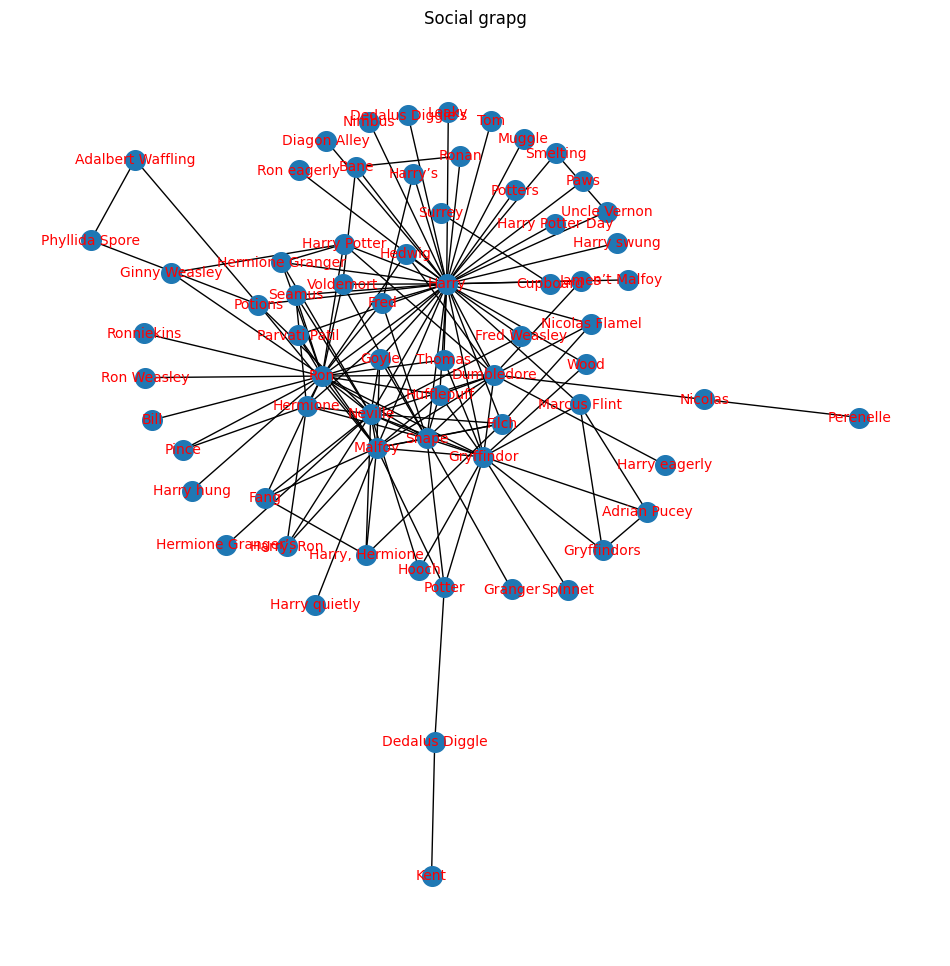

In [64]:
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(12, 12))
plt.title("Social grapg")
nx.draw(G, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()

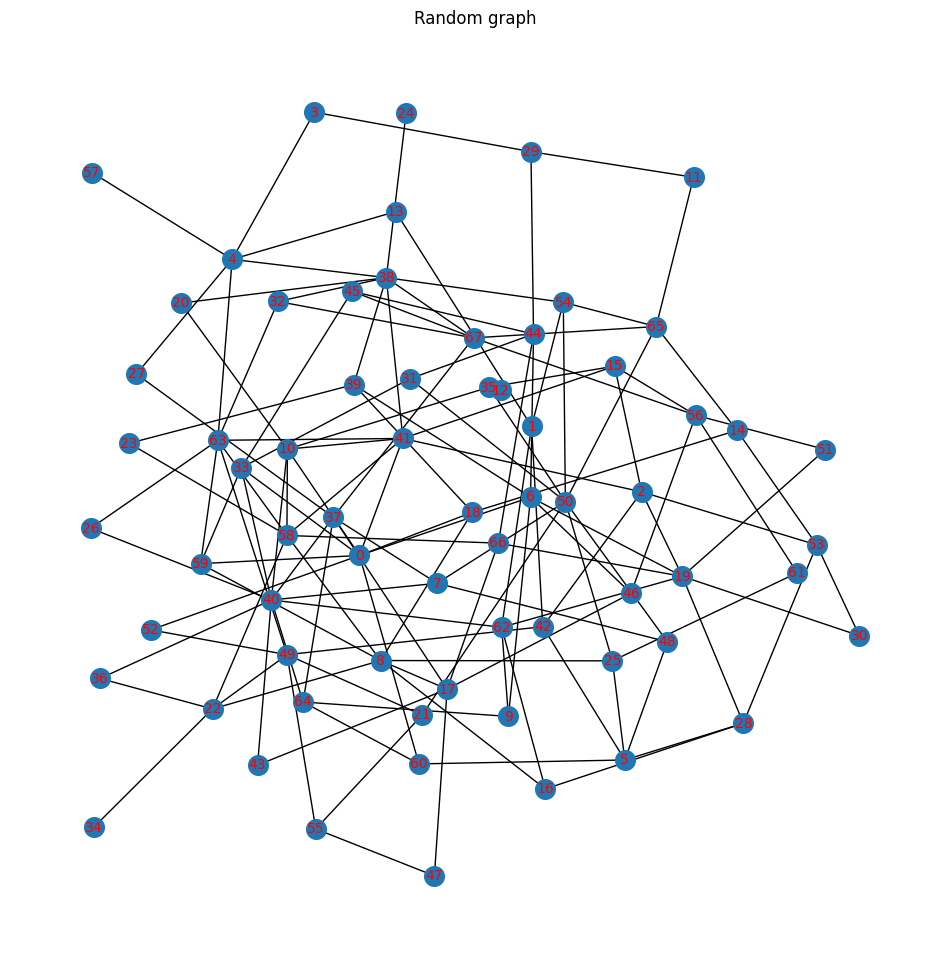

In [63]:
pos = nx.kamada_kawai_layout(random_graph_model)
plt.figure(figsize=(12, 12))
plt.title("Random graph")
nx.draw(random_graph_model, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()

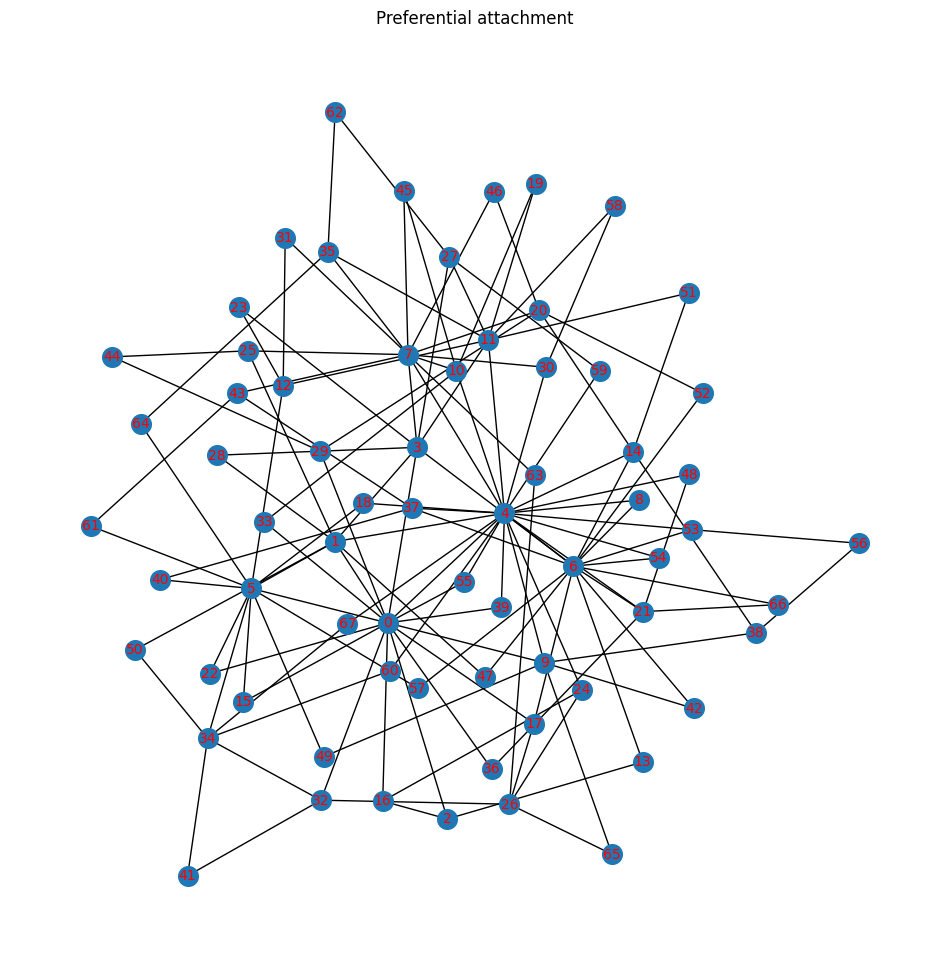

In [62]:
pos = nx.kamada_kawai_layout(preferential_attachment_model)
plt.figure(figsize=(12, 12))
plt.title("Preferential attachment")
nx.draw(preferential_attachment_model, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()

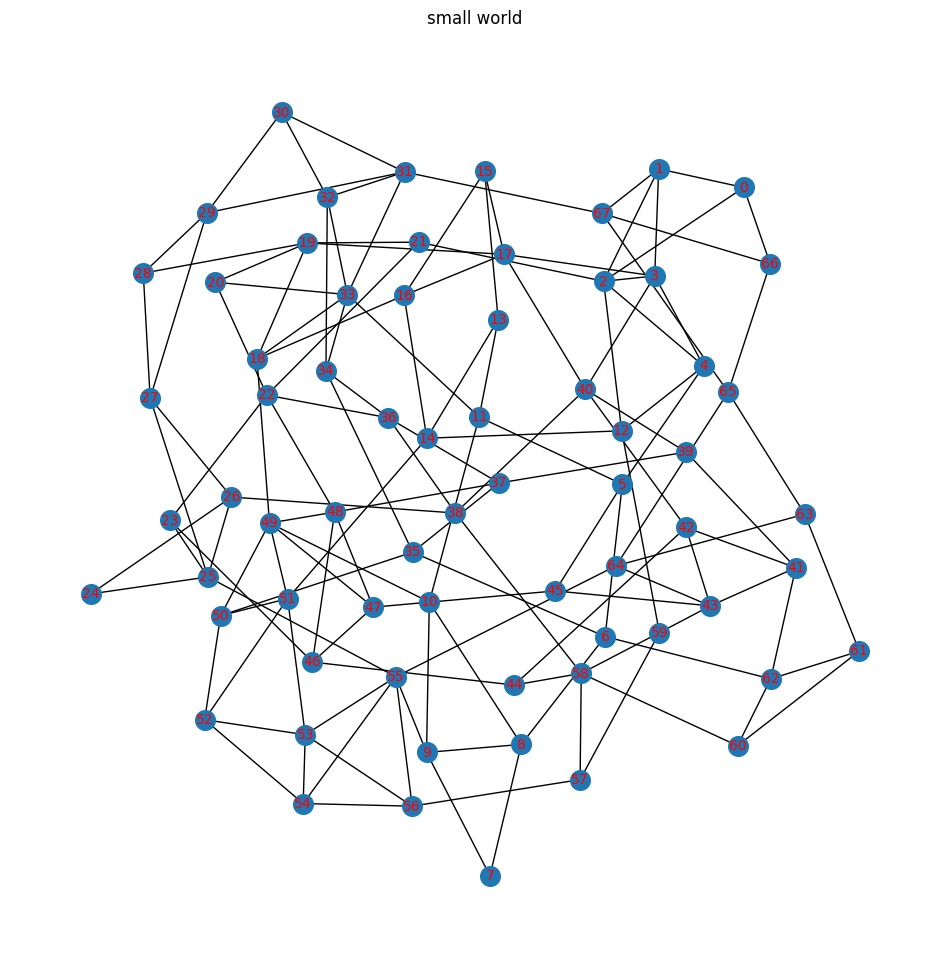

In [61]:
pos = nx.kamada_kawai_layout(small_world_model)
plt.figure(figsize=(12, 12))
plt.title("small world")
nx.draw(small_world_model, pos, with_labels=True, font_size=10, node_size=200, font_color='red')
plt.show()